In [ ]:
import os
os.chdir('')  # replace this with the absolute path of qr-hint-code
print(os.getcwd())

from z3 import *
from bool_test import QueryTest
from query_info import *
from utils import *
import json
import matplotlib.pyplot as plt
import time
import numpy as np

In [ ]:
tests = ['tpc-h-test/num-rs-test/q7_multiple.json']
num_mistakes = [1,2,3,4,5]
# num_mistakes = [1,2,4]

fg_time = []
fg_cost = []
fg_best_cost = []

fg_test_obj = []


for t in tests:
    f = open(t)
    data = json.load(f)
    
    for i in num_mistakes:
        case = 'case' + str(i)
        q1_info = QueryInfo(data['q1'])
        q2_info = QueryInfo(data[case]['q2'])
        m = MappingInfo(q1_info, q2_info)
        t = QueryTest(q1_info, q2_info, m.z3_var_lookup, m.table_mappings[0], m.table_mappings_reverse[0])
        fg_best_cost.append(data[case]['cost'])
        
        start = time.time()
        t.test_where_having_min_overall_fg()
        end = time.time()
        fg_time.append(round(end - start, 2))
        fg_cost.append(t.fg_min_cost)
    
        fg_test_obj.append(t)

In [3]:
print(fg_time)
print(fg_cost)
for i in range(len(num_mistakes)):
    print(f'============num mistake: {num_mistakes[i]}================')
    print(fg_test_obj[i].fg_converge[0])
    print(fg_test_obj[i].fg_converge[1])



[4.04, 56.14, 49.53, 3.82, 3.61]
[0.25, 0.69, 0.95, 1.64, 1.64]
============num mistake: 1================
[3.96]
[0.25]
============num mistake: 2================
[3.46, 6.9, 10.37, 13.86, 21.18, 28.54, 35.48, 42.48, 49.78, 53.16, 56.13]
[0.69, 0.91, 0.91, 0.91, 1.03, 1.03, 0.94, 0.94, 1.2, 0.95, 1.64]
============num mistake: 3================
[7.66, 21.65, 35.8, 43.15, 46.55, 49.51]
[1.03, 1.12, 1.12, 1.2, 0.95, 1.64]
============num mistake: 4================
[3.81]
[1.64]
============num mistake: 5================
[3.59]
[1.64]


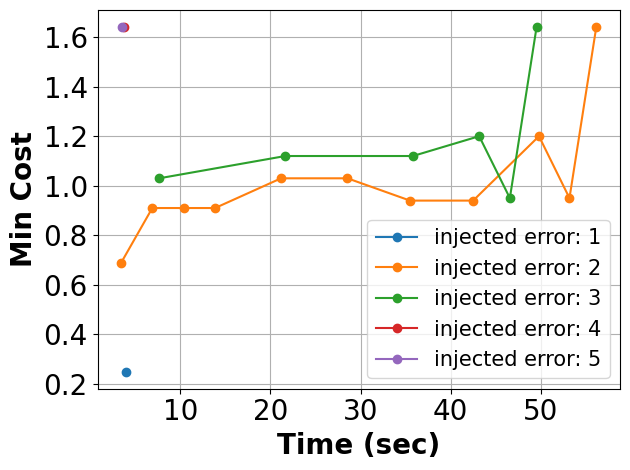

In [42]:
# Restore data here
for i in range(len(num_mistakes)):
    plt.plot(fg_test_obj[i].fg_converge[0], fg_test_obj[i].fg_converge[1], label=f'injected error: {num_mistakes[i]}', marker='o')

plt.xlabel('Time (sec)', fontweight ='bold', fontsize = 20)
plt.ylabel('Min Cost', fontweight ='bold', fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(prop={'size': 15})
plt.grid()
plt.tight_layout()
plt.savefig('min_cost_over_time.png')
plt.show()

In [ ]:
tests = ['tpc-h-test/num-rs-test/q7_multiple.json']
num_mistakes = [1,2,3,4,5]
# num_mistakes = [1,2,4]

fo_time = []
fo_cost = []
fo_best_cost = []

fo_test_obj = []


for t in tests:
    f = open(t)
    data = json.load(f)
    
    for i in num_mistakes:
        case = 'case' + str(i)
        q1_info = QueryInfo(data['q1'])
        q2_info = QueryInfo(data[case]['q2'])
        m = MappingInfo(q1_info, q2_info)
        t = QueryTest(q1_info, q2_info, m.z3_var_lookup, m.table_mappings[0], m.table_mappings_reverse[0])
        fo_best_cost.append(data[case]['cost'])
        
        start = time.time()
        t.test_where_having_min_overall_fo()
        end = time.time()
        fo_time.append(round(end - start, 2))
        fo_cost.append(t.fo_min_cost)
    
        fo_test_obj.append(t)

In [19]:
print(fo_time)
print(fo_cost)
for i in range(len(num_mistakes)):
    print(f'============num mistake: {num_mistakes[i]}================')
    print(fo_test_obj[i].fo_converge[0])
    print(fo_test_obj[i].fo_converge[1])

[11.44, 150.5, 227.73, 18.24, 17.58]
[0.25, 0.6, 0.86, 1.64, 1.64]
============num mistake: 1================
[11.36]
[0.25]
============num mistake: 2================
[10.4, 20.32, 30.37, 40.68, 60.1, 79.82, 99.7, 119.84, 139.74, 150.46]
[0.6, 0.73, 0.73, 0.73, 0.86, 0.86, 0.77, 0.77, 0.94, 0.86]
============num mistake: 3================
[47.87, 94.44, 140.77, 188.46, 218.49, 227.72]
[0.86, 0.86, 0.86, 0.94, 0.86, 0.94]
============num mistake: 4================
[18.23]
[1.64]
============num mistake: 5================
[17.57]
[1.64]


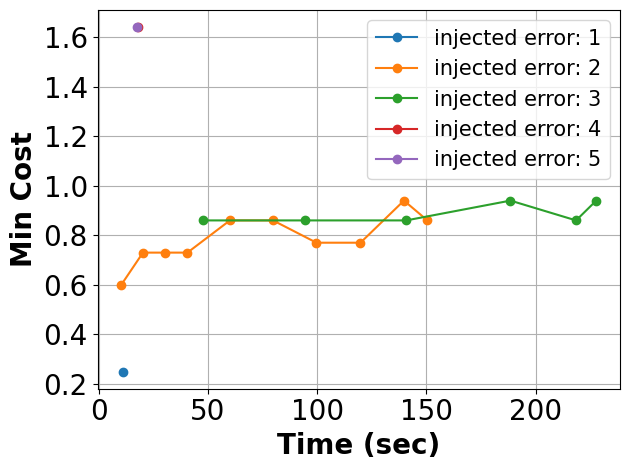

In [41]:
for i in range(len(num_mistakes)):
    plt.plot(fo_test_obj[i].fo_converge[0], fo_test_obj[i].fo_converge[1], label=f'injected error: {num_mistakes[i]}', marker='o')

plt.xlabel('Time (sec)', fontweight ='bold', fontsize = 20)
plt.ylabel('Min Cost', fontweight ='bold', fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

 
plt.legend(prop={'size': 15})
plt.grid()
plt.tight_layout()
plt.savefig('optimized_min_cost_over_time.png')
plt.show()

# Overall Data Plot (Cost & Time Bar Chart)

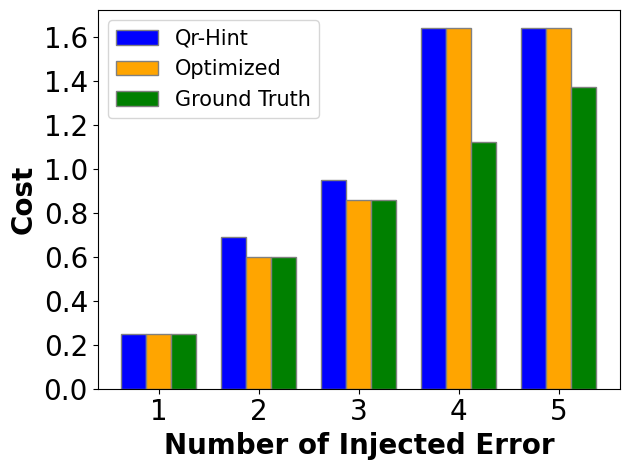

In [38]:
x_label = ['1', '2', '3', '4', '5']

barWidth = 0.25
br1 = np.arange(len(fg_cost))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, fg_cost, color ='blue', width = barWidth,
        edgecolor ='grey', label ='Qr-Hint')
plt.bar(br2, fo_cost, color ='orange', width = barWidth,
        edgecolor ='grey', label ='Optimized')
plt.bar(br3, fo_best_cost, color ='green', width = barWidth,
        edgecolor ='grey', label ='Ground Truth')



 
# Adding Xticks
plt.xlabel('Number of Injected Error', fontweight ='bold', fontsize = 20)
plt.ylabel('Cost', fontweight ='bold', fontsize = 20)
plt.xticks([r + barWidth/1 for r in range(len(fg_cost))],
            x_label, fontsize=20)
plt.yticks(fontsize=20)
 
plt.legend(prop={'size': 15})
plt.tight_layout()
plt.savefig('cost_vs_error.png')
plt.show()

In [33]:
fo_best_cost = [0.25,0.60,0.86,1.12,1.37]
fg_best_cost = [0.25,0.60,0.86,1.12,1.37]

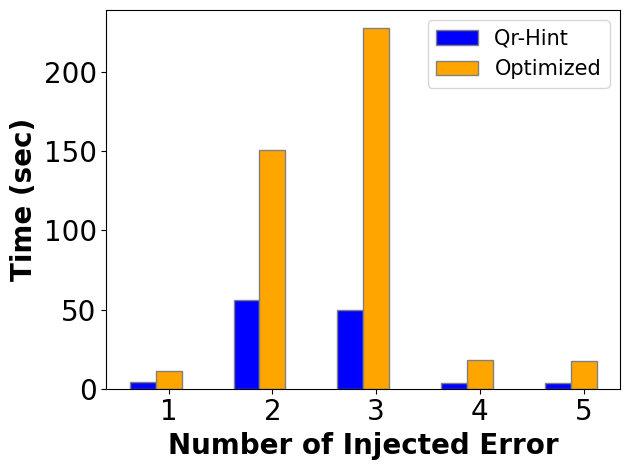

In [37]:
x_label = ['1', '2', '3', '4', '5']

barWidth = 0.25
br1 = np.arange(len(fg_cost))
br2 = [x + barWidth for x in br1]
# br3 = [x + barWidth for x in br2]

plt.bar(br1, fg_time, color ='blue', width = barWidth,
        edgecolor ='grey', label ='Qr-Hint ')
plt.bar(br2, fo_time, color ='orange', width = barWidth,
        edgecolor ='grey', label ='Optimized')

 
# Adding Xticks
plt.xlabel('Number of Injected Error', fontweight ='bold', fontsize = 20)
plt.ylabel('Time (sec)', fontweight ='bold', fontsize = 20)
plt.xticks([r + barWidth/1 for r in range(len(fg_cost))],
            x_label, fontsize=20)
plt.yticks(fontsize=20)
 
plt.legend(prop={'size': 15})
plt.tight_layout()
plt.savefig('time_vs_error.png')
plt.show()